### Visualizations

In [1]:
from qiskit import IBMQ
IBMQ.save_account('f7d465f50d0ab45b08ff54a60357e11e87e18ba615c8641e9adcbdc52bddf8a71bb183eb57daa1850c41d6201605ee06f61687edde050bdd1247d15cb15f954d',overwrite=True)

In [20]:
import numpy as np
import math
from math import pi, sqrt
# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.quantum_info import random_statevector
from qiskit.quantum_info import Statevector
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-11-24 22:14:08,462: Credentials are already in use. The existing account in the session will be replaced.


#### Histogram 

{'100': 147, '101': 112, '110': 138, '001': 109, '011': 133, '111': 131, '000': 127, '010': 127}


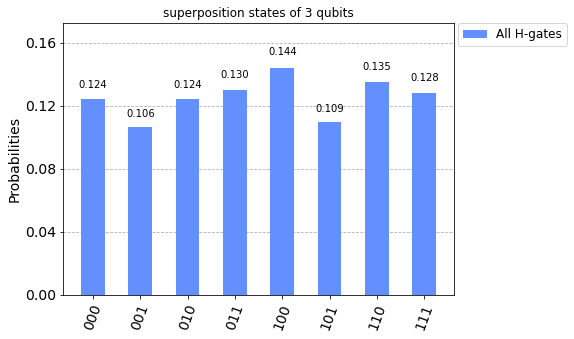

In [21]:
q = QuantumRegister(3,'q')
qc = QuantumCircuit(q)
qc.h(q[0:3])
qc.measure_all()

qasm_sim = BasicAer.get_backend('qasm_simulator') 
result = execute(qc, qasm_sim).result() 
counts = result.get_counts()
print(counts)
legend = ['All H-gates']
title = "superposition states of 3 qubits"
plot_histogram(counts,legend=legend,title=title)

#### QSphere

In [22]:
bell_state = QuantumCircuit(2)
bell_state.h(0)
bell_state.cx(0,1)
sv = Statevector.from_int(0,2**2) 
sv_ev_bell = sv.evolve(bell_state)
sv_ev_bell.draw('latex')

<IPython.core.display.Latex object>

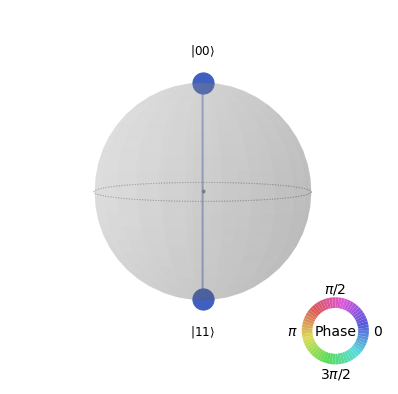

In [23]:
plot_state_qsphere(sv_ev_bell)

In [6]:
ghz_circuit = QuantumCircuit(3)
ghz_circuit.h(0)
ghz_circuit.cx([0,0],[1,2]) 
sv = Statevector.from_int(0,2**3) 
sv_ev_ghz = sv.evolve(ghz_circuit)
sv_ev_ghz.draw('latex')

<IPython.core.display.Latex object>

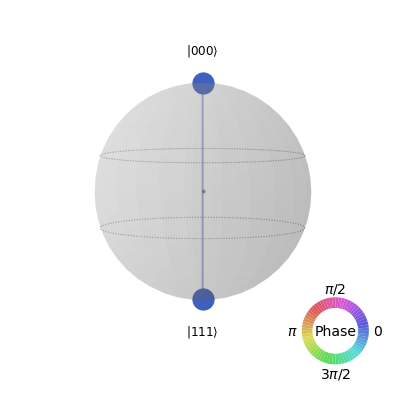

In [24]:
plot_state_qsphere(sv_ev_ghz)

### Bloch vector 

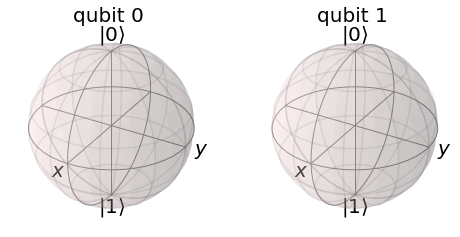

In [8]:
plot_bloch_multivector(sv_ev_bell)

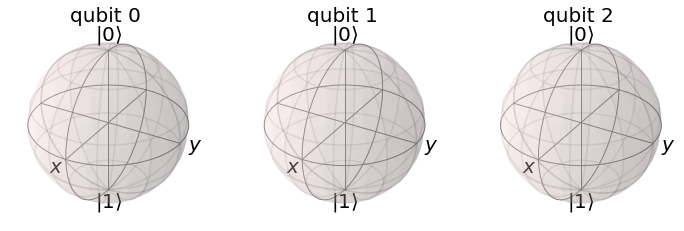

In [9]:
plot_bloch_multivector(sv_ev_ghz)

#### The above two circuits have maximally entangled state,we cannot seperate the states.
####  since we cannot seperate the states, the diagram is not showing any significance

In [10]:
qc_circuit = QuantumCircuit(2)
qc_circuit.h(0)
qc_circuit.x(1)
sv = Statevector.from_int(0,2**2) 
sv_ev_qc= sv.evolve(qc_circuit)
sv_ev_qc.draw('latex')

<IPython.core.display.Latex object>

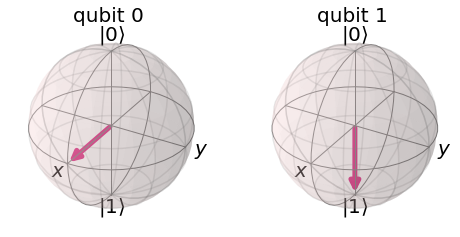

In [11]:
plot_bloch_multivector(sv_ev_qc)

### Bloch vector 

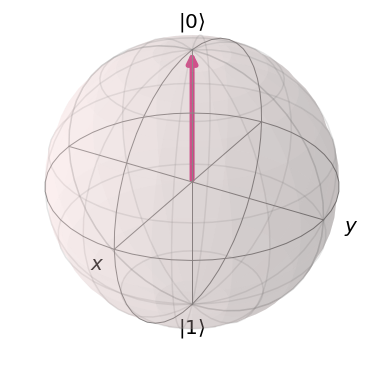

In [12]:
plot_bloch_vector([0,0,1])

$|0 \rangle$   the corresponding bloch vector is (0,0,1) <br>
$|1 \rangle$   the corresponding bloch vector is (0,0,-1) <br>
$|+ \rangle$   the corresponding bloch vector is (1,0,0) <br>
$|- \rangle$   the corresponding bloch vector is (-1,0,0) <br>
$|i \rangle$   the corresponding bloch vector is (0,1,0) <br>
$|-i \rangle$  the corresponding bloch vector is (0,-1,0) <br>

### Density matrix 

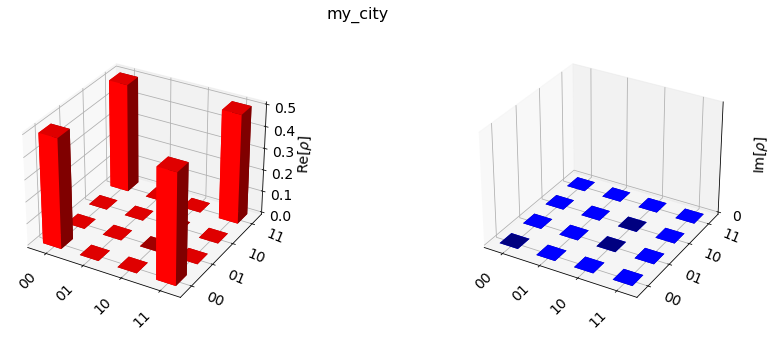

In [13]:
plot_state_city(sv_ev_bell, title='my_city',color=['red','blue'])

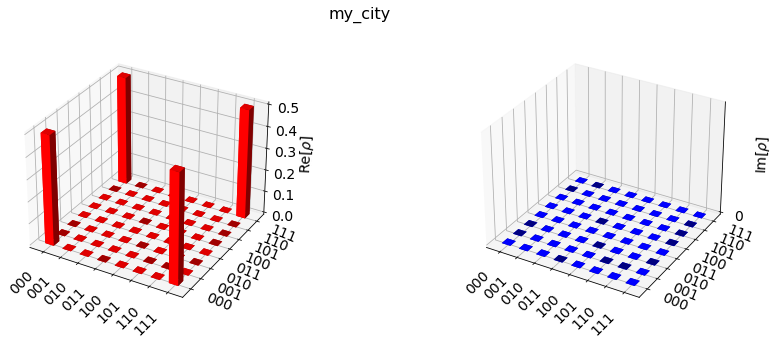

In [14]:
plot_state_city(sv_ev_ghz, title='my_city',color=['red','blue'])

### gate map with error rates

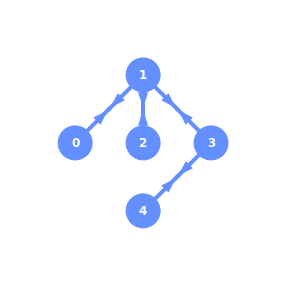

In [17]:
from qiskit.visualization import plot_gate_map
backend = provider.get_backend('ibmq_quito')
plot_gate_map(backend, plot_directed=True)

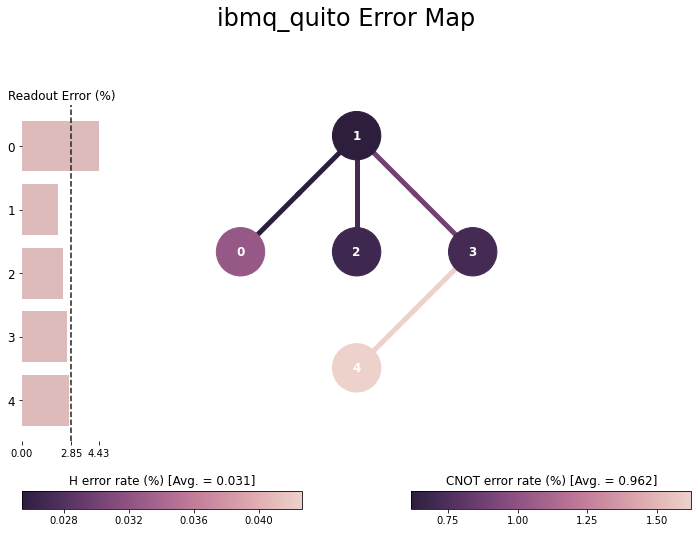

In [18]:
plot_error_map(backend) 

In [19]:
import qiskit.tools.jupyter
%qiskit_backend_overview